## Installing the Libraries

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings('ignore')

#### DATA  PREPROCESSING

In [34]:
data = pd.read_csv('mail_data.csv')
df = data.copy()
df = df.where((pd.notnull(df)), '')
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})

#### DATA VISUALIZATION

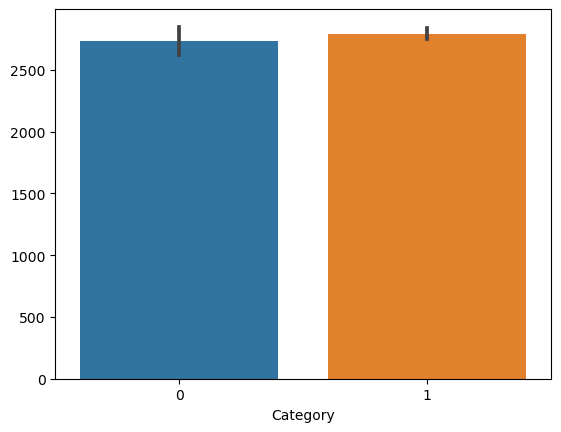

In [35]:
sns.barplot(x='Category', y=df.Category.index, data=df);

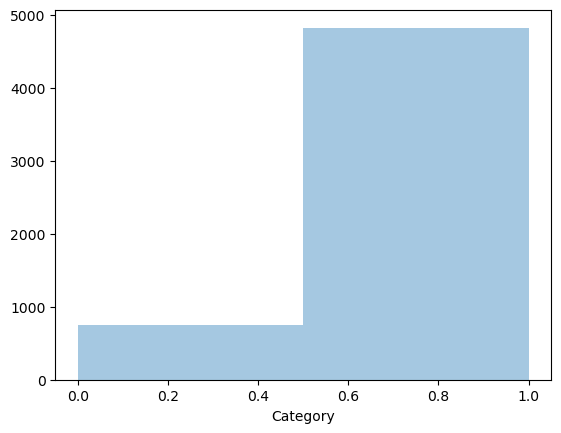

In [36]:
sns.distplot(df.Category, bins=2, kde=False);

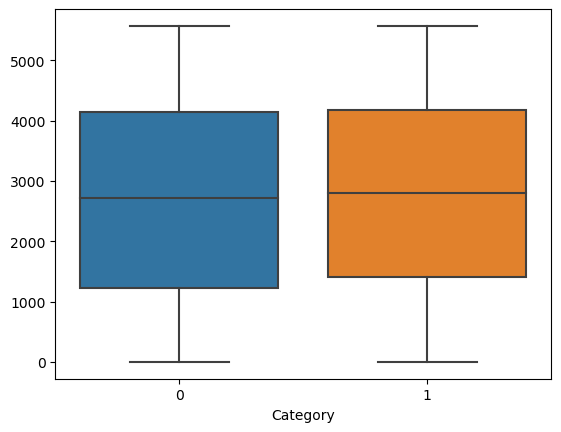

In [37]:
sns.boxplot(x='Category', y=df.Category.index, data=df);

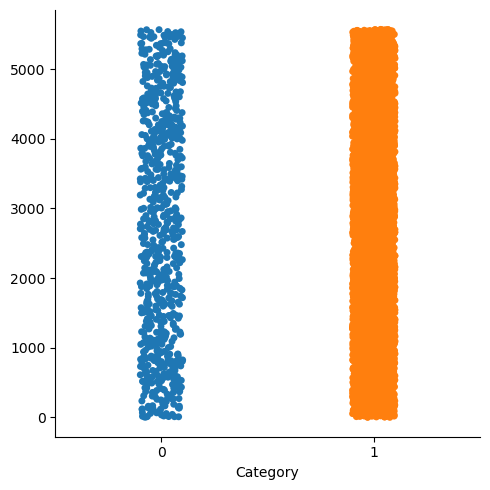

In [38]:
sns.catplot(x='Category', y=df.Category.index, hue='Category', data=df);

#### SEPERATE X, Y AND TRANSFORM

In [39]:
X = df['Message']
y = df['Category']
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_features = feature_extraction.fit_transform(X)

#### TEST-TRAIN

In [40]:
def calculate(model):
    x_train, x_test, y_train, y_test = train_test_split(X_features, y, test_size=0.25)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    prec = precision_score(y_test, y_pred)
    print('Prec: ', prec)
    recall = recall_score(y_test, y_pred)
    print('Recall Score: ', recall)
    f1_scr = f1_score(y_test, y_pred)
    print('F1-Score: ', f1_scr)
    log_los = log_loss(y_test, y_pred)
    print('Log Score: ', log_los)
    #conf_matrix = confusion_matrix(y_test, y_pred)
    #print('Confussion Matrix: ', conf_matrix)
    


#### LOGISTIC REGRESSION

In [41]:
model_log = LogisticRegression()
calculate(model_log)

Accuracy:  0.955491744436468
Prec:  0.9538341158059468
Recall Score:  0.997545008183306
F1-Score:  0.9752
Log Score:  1.6042401364861905


#### XGBOOST

In [42]:
model_xgb = XGBClassifier()
calculate(model_xgb)

Accuracy:  0.9720028715003589
Prec:  0.9754901960784313
Recall Score:  0.9925187032418953
F1-Score:  0.9839307787391842
Log Score:  1.0091187955316363


#### LIGHT GBM

In [43]:
model_lgbm = LGBMClassifier()
calculate(model_lgbm)

[LightGBM] [Info] Number of positive: 3624, number of negative: 555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5189
[LightGBM] [Info] Number of data points in the train set: 4179, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.867193 -> initscore=1.876366
[LightGBM] [Info] Start training from score 1.876366
Accuracy:  0.9798994974874372
Prec:  0.9803439803439803
Recall Score:  0.9966694421315571
F1-Score:  0.9884393063583815
Log Score:  0.7244955455098927


#### EXTRA TREE

In [44]:
model_ext = ExtraTreesClassifier()
calculate(model_ext)

Accuracy:  0.9798994974874372
Prec:  0.9798873692679002
Recall Score:  0.9975429975429976
F1-Score:  0.9886363636363636
Log Score:  0.7244955455098927


#### RANDOM FOREST

In [45]:
model_rf = RandomForestClassifier()
calculate(model_rf)

Accuracy:  0.9727207465900933
Prec:  0.9697959183673469
Recall Score:  0.9991589571068125
F1-Score:  0.984258492129246
Log Score:  0.9832439546205686


#### DECISION TREE

In [46]:
model_dec = DecisionTreeClassifier()
calculate(model_dec)

Accuracy:  0.9655419956927495
Prec:  0.9746732026143791
Recall Score:  0.9859504132231405
F1-Score:  0.9802793755135579
Log Score:  1.2419923637312444


## In conclusion, based on the evaluation metrics, it appears that the LightGBM, Extra Trees Classifier, and RandomForest Classifier models are showing the best performance. However, determining which model is the best may require further experimentation and model tuning. Additionally, models' performances can be compared more reliably using cross-validation.




